## Capstone Project 1: Data Storytelling

Data Source:  http://jmcauley.ucsd.edu/data/amazon/

For this project I will use three product categories datasets: baby products, grocery and gourment foods, and cellephones dataset.

The objective of my Capstone project 1 (sentiment Analysis of Amazon product reviews) is to determine polarity of a review text i.e. whether a given review is positive (rating: 4 or 5) or negative(rating 1 or 2) based on ratings and reviews, which can help businesses make decision based on customer reviews.

In this exploration of Amazon product reviews dataset, I will analyse the features of review text with respect to ratings.
These are the questions I will look in the data:

- How the distribution of data based on review categories (or star ratings) and distribution of review length looks like? 
- How the distribution of number of ratings in different product categories looks like?
- How the reviews change across high and low star ratings based on review length and percentage of UPPERCASE words per review   
  for different product categories?
- what are the most frequently used words for high and low ratings and it's vizualization with word clouds? 



In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
import seaborn as sns

import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud


#### JSON files loaded to pandas DatFrame for the three product categories

In [2]:
# Read json file into a pandas Dataframe

baby_products = pd.read_json('Baby_5.json', lines=True)

# Take a look at the first 5 rows
baby_products.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1HK2FQW6KXQB2,097293751X,"Amanda Johnsen ""Amanda E. Johnsen""","[0, 0]",Perfect for new parents. We were able to keep ...,5,Awesine,1373932800,"07 16, 2013"
1,A19K65VY14D13R,097293751X,angela,"[0, 0]",This book is such a life saver. It has been s...,5,Should be required for all new parents!,1372464000,"06 29, 2013"
2,A2LL1TGG90977E,097293751X,Carter,"[0, 0]",Helps me know exactly how my babies day has go...,5,Grandmother watching baby,1395187200,"03 19, 2014"
3,A5G19RYX8599E,097293751X,cfpurplerose,"[0, 0]",I bought this a few times for my older son and...,5,repeat buyer,1376697600,"08 17, 2013"
4,A2496A4EWMLQ7,097293751X,C. Jeter,"[0, 0]",I wanted an alternative to printing out daily ...,4,Great,1396310400,"04 1, 2014"


In [3]:
grocery_foods = pd.read_json('Grocery_and_Gourmet_Food_5.json', lines=True)
grocery_foods.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4,Good Taste,1370044800,"06 1, 2013"
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014"


In [4]:
cell_phones = pd.read_json('Cell_Phones_and_Accessories_5.json', lines=True)
cell_phones.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"


In [5]:
# column names
baby_products.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [6]:
# Rename the columns 

baby_products = baby_products.rename(columns = {'overall': 'rating', 'summary': 'review_summary'})


grocery_foods = grocery_foods.rename(columns = {'overall': 'rating', 'summary': 'review_summary'})

cell_phones = cell_phones.rename(columns = {'overall': 'rating', 'summary': 'review_summary'})
cell_phones.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,rating,review_summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"


In [7]:
# Find out total no of rows and columns

baby_products.shape

(160792, 9)

In [8]:
grocery_foods.shape

(151254, 9)

In [9]:
cell_phones.shape

(194439, 9)

#### Find if there is any missing value in datasets and count them.

In [10]:
# Any misssing values ?
baby_products.isnull().values.any()

True

In [11]:
grocery_foods.isnull().values.any()

True

In [12]:
cell_phones.isnull().values.any()

True

In [13]:
# Count missing values
baby_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160792 entries, 0 to 160791
Data columns (total 9 columns):
reviewerID        160792 non-null object
asin              160792 non-null object
reviewerName      159427 non-null object
helpful           160792 non-null object
reviewText        160792 non-null object
rating            160792 non-null int64
review_summary    160792 non-null object
unixReviewTime    160792 non-null int64
reviewTime        160792 non-null object
dtypes: int64(2), object(7)
memory usage: 11.0+ MB


In [14]:
grocery_foods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151254 entries, 0 to 151253
Data columns (total 9 columns):
reviewerID        151254 non-null object
asin              151254 non-null object
reviewerName      149761 non-null object
helpful           151254 non-null object
reviewText        151254 non-null object
rating            151254 non-null int64
review_summary    151254 non-null object
unixReviewTime    151254 non-null int64
reviewTime        151254 non-null object
dtypes: int64(2), object(7)
memory usage: 10.4+ MB


In [15]:
cell_phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 9 columns):
reviewerID        194439 non-null object
asin              194439 non-null object
reviewerName      190920 non-null object
helpful           194439 non-null object
reviewText        194439 non-null object
rating            194439 non-null int64
review_summary    194439 non-null object
unixReviewTime    194439 non-null int64
reviewTime        194439 non-null object
dtypes: int64(2), object(7)
memory usage: 13.4+ MB


In [16]:
# Total number of missing values
print(baby_products.isnull().sum().sum())
print(grocery_foods.isnull().sum().sum())
print(cell_phones.isnull().sum().sum())

1365
1493
3519


There are missing values only in the reviewer's name attribute. For our analysis I will be using only the reviewText and ratings columns. So I will not remove the missing value rows because it does not change the analysis in either ways.

In [17]:
# Keep the review columns and rating (drop the rest of the columns)

baby_products = baby_products.drop(columns=['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewTime'])
grocery_foods = grocery_foods.drop(columns=['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewTime'])
cell_phones = cell_phones.drop(columns=['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewTime'])
cell_phones.head(2)

,reviewText,rating,review_summary
0,They look good and stick good! I just don't li...,4,Looks Good
1,These stickers work like the review says they ...,5,Really great product.


#### Check for duplicate review text rows and drop them

In [18]:
# Check for duplicate reviewText 

duplicate_rev_baby = baby_products.duplicated(subset='reviewText', keep='first').sum()
duplicate_rev_baby

69

In [19]:
duplicate_rev_food = grocery_foods.duplicated(subset='reviewText', keep='first').sum()
duplicate_rev_food

55

In [20]:
duplicate_rev_phone = cell_phones.duplicated(subset='reviewText', keep='first').sum()
duplicate_rev_phone

253

In [21]:
# Drop duplicate reviewText
baby_products = baby_products.drop_duplicates(subset = 'reviewText', keep='first')
len(baby_products)

160723

In [22]:
grocery_foods = grocery_foods.drop_duplicates(subset = 'reviewText', keep='first')
len(grocery_foods)

151199

In [23]:
cell_phones = cell_phones.drop_duplicates(subset = 'reviewText', keep='first')
len(cell_phones)

194186

#### I will remove short review text of less than 3 words. Because sentiment analysis are less effective when review texts are short

In [24]:
# Remove short reviewText: less than < 3 words

def remove_short_review(text):
    length = len(text.split())
    if length >= 3:
        return True
    else:
        return False
    
baby_products = baby_products[baby_products['reviewText'].apply(lambda x:remove_short_review(x))]
len(baby_products)

160662

In [25]:
grocery_foods = grocery_foods[grocery_foods['reviewText'].apply(lambda x: remove_short_review(x))]
len(grocery_foods)

151054

In [26]:
cell_phones = cell_phones[cell_phones['reviewText'].apply(lambda x: remove_short_review(x))]
len(cell_phones)

193876

#### Remove non_English reviews

In [32]:
from langdetect import detect

def mydetect(txt):
    try:
        return detect(txt)
    except LangDetectException:
        pass

baby_products['clean_review_baby'] = baby_products['reviewText'].apply(mydetect)
baby_products.head(2)

NameError: name 'LangDetectException' is not defined

In [ ]:
#for e in baby_products['reviewText']:
    #try:
        #if detect(e) == 'en':
            #print(e)
    #except LangDetectException:
        #pass

In [27]:
# Remove non-English using NLTK
import nltk 
nltk.download('words')
words = set(nltk.corpus.words.words())

def remove_non_en(text):
    text = " ".join(w.lower() for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    return text
baby_products['clean_review_baby'] = baby_products['reviewText'].apply(lambda x: remove_non_en(x))
baby_products.head(5)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\prava\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


,reviewText,rating,review_summary,clean_review_baby
0,Perfect for new parents. We were able to keep ...,5,Awesine,perfect for new . we were able to keep track o...
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!,this book is such a life saver . it been so he...
2,Helps me know exactly how my babies day has go...,5,Grandmother watching baby,me know exactly how my day gone with my mother...
3,I bought this a few times for my older son and...,5,repeat buyer,i bought this a few times for my older son and...
4,I wanted an alternative to printing out daily ...,4,Great,i an alternative to printing out daily log for...


In [28]:
grocery_foods['clean_review_food'] = grocery_foods['reviewText'].apply(lambda x: remove_non_en(x))
grocery_foods.head(2)

,reviewText,rating,review_summary,clean_review_food
0,Just another flavor of Kit Kat but the taste i...,4,Good Taste,just another flavor of kit kat but the taste i...
1,I bought this on impulse and it comes from Jap...,3,"3.5 stars, sadly not as wonderful as I had hoped",i bought this on impulse and it comes from jap...


In [29]:
cell_phones['clean_review_phone']= cell_phones['reviewText'].apply(lambda x: remove_non_en(x))
cell_phones.head(2)

,reviewText,rating,review_summary,clean_review_phone
0,They look good and stick good! I just don't li...,4,Looks Good,they look good and stick good ! i just don ' t...
1,These stickers work like the review says they ...,5,Really great product.,these stickers work like the review they do . ...


### Distributions

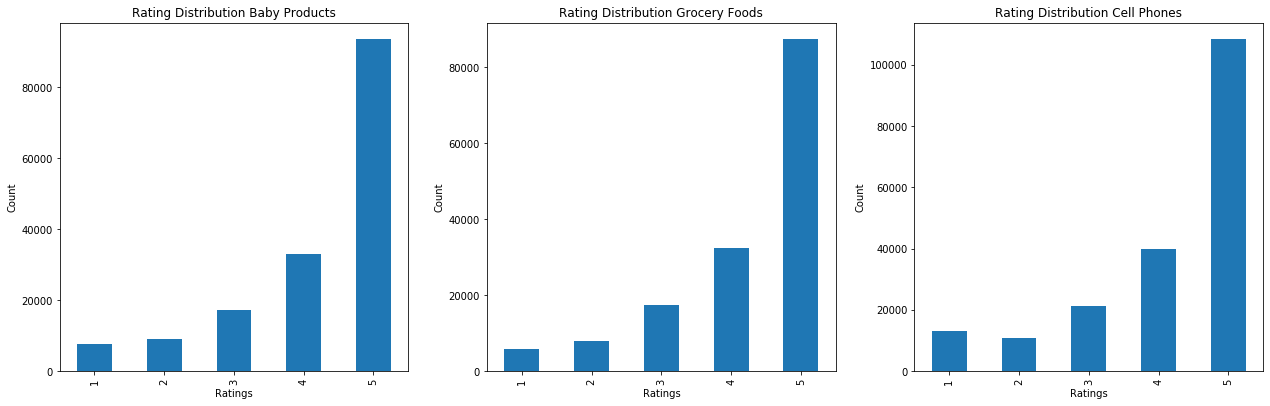

In [75]:
# Rating Distributions
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1); baby_products['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution Baby Products').set(xlabel='Ratings', ylabel="Count")
plt.subplot(1,3,2); grocery_foods['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution Grocery Foods').set(xlabel='Ratings', ylabel="Count")
plt.subplot(1,3,3);cell_phones['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution Cell Phones').set(xlabel='Ratings', ylabel="Count")
plt.tight_layout(pad=2)

We notice that most of the reviews are five stars in all the three product categories

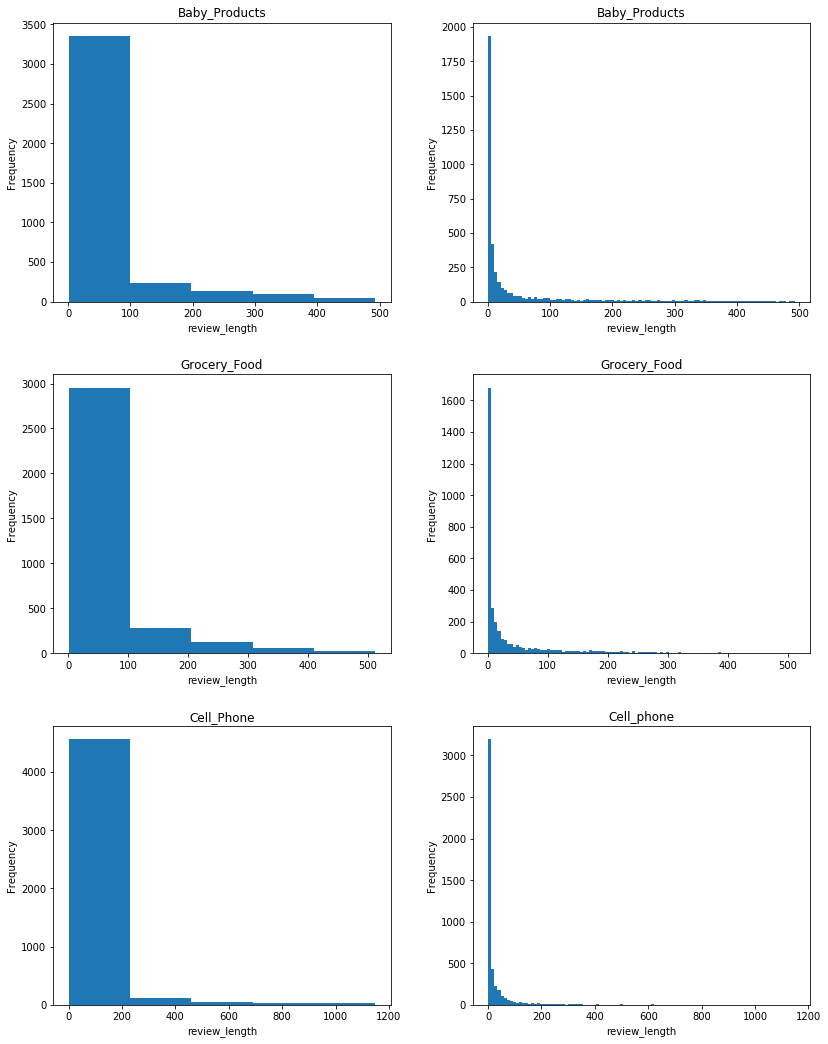

In [50]:
# Review length Distribution
rev_len_baby = baby_products['reviewText'].apply(len)
rev_len_food = grocery_foods['reviewText'].apply(len)
rev_len_phone = cell_phones['reviewText'].apply(len)
plt.figure(figsize=(12,15))
plt.subplot(3, 2, 1); rev_len_baby.value_counts().sort_index().plot(kind='hist', bins= 5, title='Baby_Products').set_xlabel('review_length')
plt.subplot(3, 2, 2);rev_len_baby.value_counts().sort_index().plot(kind='hist', bins= 100, title='Baby_Products').set_xlabel('review_length')
plt.subplot(3, 2, 3);rev_len_food.value_counts().sort_index().plot(kind='hist', bins= 5, title='Grocery_Food').set_xlabel('review_length')
plt.subplot(3, 2, 4);rev_len_food.value_counts().sort_index().plot(kind='hist', bins= 100, title='Grocery_Food').set_xlabel('review_length')
plt.subplot(3, 2, 5);rev_len_phone.value_counts().sort_index().plot(kind='hist', bins= 5, title='Cell_Phone').set_xlabel('review_length')
plt.subplot(3, 2, 6);rev_len_phone.value_counts().sort_index().plot(kind='hist', bins= 100, title='Cell_phone').set_xlabel('review_length')
plt.tight_layout(pad=2.5)

Most of the baby product and grocery food reviews are of length 100 but cell phone reviews are little longer.

#### Distribution of review length and percentage of UPPERCASE per review across the different levels of star ratings

In [30]:
# baby_products distribution

rev_rating = baby_products[['rating', 'reviewText']]

rev_rating_copy = rev_rating.copy()
rev_rating_copy['rev_length'] = rev_rating_copy['reviewText'].apply(len) # review length

def caps(text):
    return np.mean([1 if i.isupper() else 0 for i in text])

rev_rating_copy['capitals']= rev_rating_copy['reviewText'].apply(caps) # % caps

rating_len_cap_baby = rev_rating_copy[['rating', 'rev_length', 'capitals']]
rating_len_cap_baby.head(2)

,rating,rev_length,capitals
0,5,253,0.011858
1,5,556,0.008993


In [31]:
# Grocery_foods_Distribution

rev_rating = grocery_foods[['rating', 'reviewText']]

rev_rating_copy = rev_rating.copy()
rev_rating_copy['rev_length'] = rev_rating_copy['reviewText'].apply(len) # review length

def caps(text):
    return np.mean([1 if i.isupper() else 0 for i in text])

rev_rating_copy['capitals']= rev_rating_copy['reviewText'].apply(caps) # % caps

rating_len_cap_food = rev_rating_copy[['rating', 'rev_length', 'capitals']]
rating_len_cap_food.head(2)

,rating,rev_length,capitals
0,4,162,0.030864
1,3,583,0.015437


In [32]:
# Cell_phones_Distribution
rev_rating = cell_phones[['rating', 'reviewText']]

rev_rating_copy = rev_rating.copy()
rev_rating_copy['rev_length'] = rev_rating_copy['reviewText'].apply(len) # review length

def caps(text):
    return np.mean([1 if i.isupper() else 0 for i in text])

rev_rating_copy['capitals']= rev_rating_copy['reviewText'].apply(caps) # % caps

rating_len_cap_phone = rev_rating_copy[['rating', 'rev_length', 'capitals']]
rating_len_cap_phone.head(2)

,rating,rev_length,capitals
0,4,189,0.026455
1,5,160,0.025000


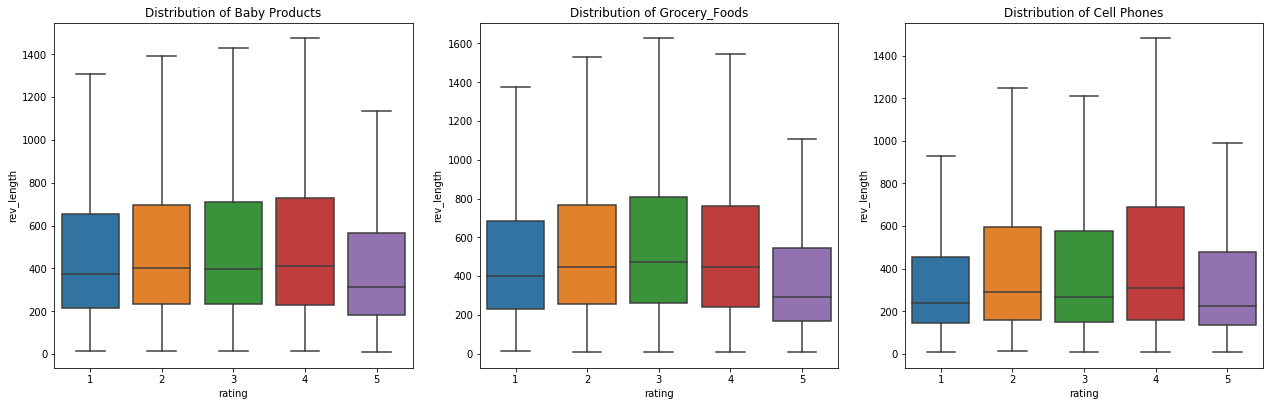

In [76]:
# rating and review length distribution
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1); sns.boxplot(x = 'rating', y = 'rev_length', data = rating_len_cap_baby, showfliers=False).set(title='Distribution of Baby Products')
plt.subplot(1,3,2); sns.boxplot(x = 'rating', y = 'rev_length', data = rating_len_cap_food, showfliers=False).set(title='Distribution of Grocery_Foods')
plt.subplot(1,3,3);sns.boxplot(x = 'rating', y = 'rev_length', data = rating_len_cap_phone, showfliers=False).set(title='Distribution of Cell Phones')
plt.tight_layout(pad=2)

In all of the three product categories, reviews corresponding to five star ratings are shorter length.

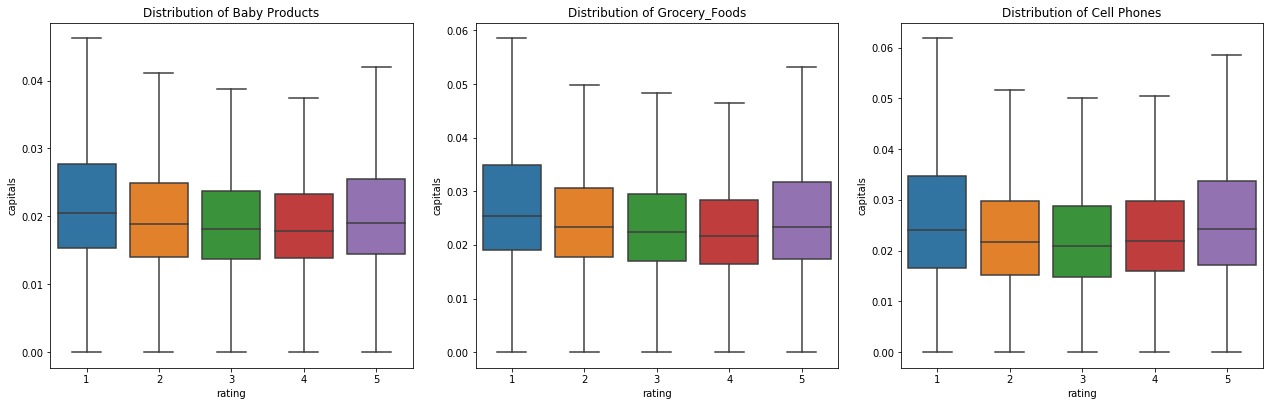

In [78]:
# Rating and % caps distribution 
plt.figure(figsize=(18,6))
plt.subplot(1,3,1);sns.boxplot(x = 'rating', y = 'capitals', data = rating_len_cap_baby, showfliers=False).set(title='Distribution of Baby Products')
plt.subplot(1,3,2);sns.boxplot(x = 'rating', y = 'capitals', data = rating_len_cap_food, showfliers=False).set(title='Distribution of Grocery_Foods')
plt.subplot(1,3,3);sns.boxplot(x = 'rating', y = 'capitals', data = rating_len_cap_phone, showfliers=False).set(title='Distribution of Cell Phones')
plt.tight_layout(pad=2)

In all the three product categories, reviews corresponding to 1 star and 5 star ratings have more uppercase letters

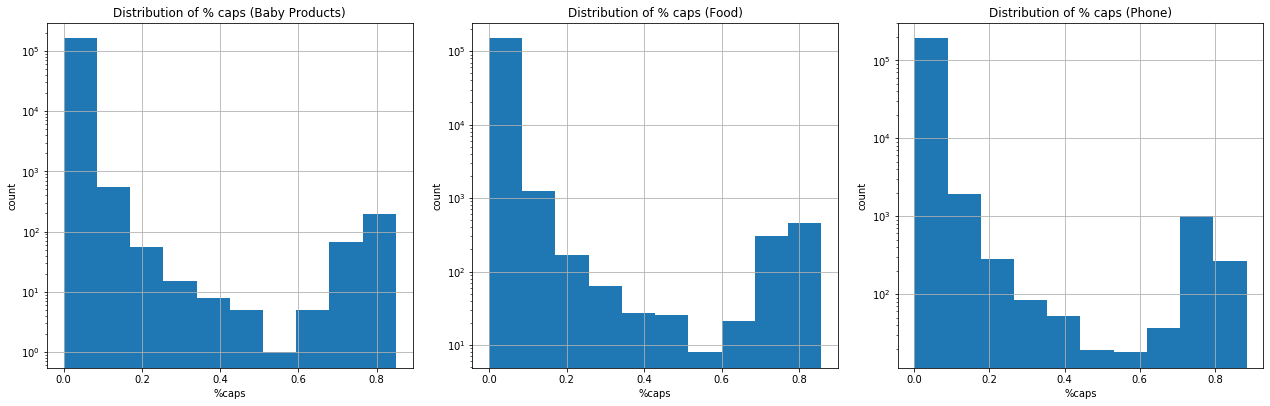

In [88]:
# Distribution of % caps baby_products

plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)

rating_len_cap_baby['capitals'].hist()
plt.yscale('log', nonposy='clip')
plt.title('Distribution of % caps (Baby Products)')
plt.xlabel('%caps')
plt.ylabel('count')

# Distribution of % caps grocery_food
plt.subplot(1,3,2); rating_len_cap_food['capitals'].hist()
plt.yscale('log', nonposy='clip')
plt.title('Distribution of % caps (Food)')
plt.xlabel('%caps')
plt.ylabel('count')

# Distribution of % caps cell_phones
plt.subplot(1,3,3); rating_len_cap_phone['capitals'].hist()
plt.yscale('log', nonposy='clip')
plt.title('Distribution of % caps (Phone)')
plt.xlabel('%caps')
plt.ylabel('count')

plt.tight_layout(pad=2.0)

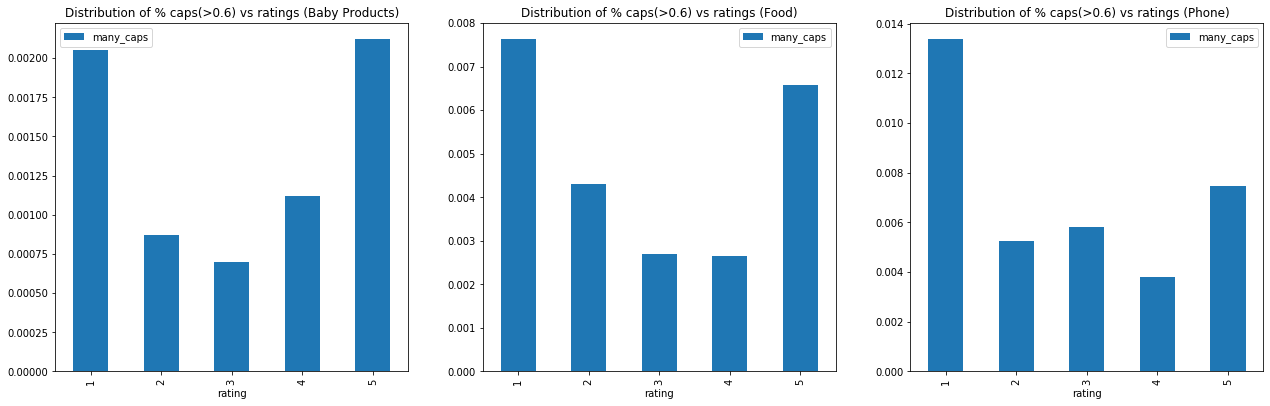

In [33]:
rating_len_cap_baby['many_caps'] = rating_len_cap_baby['capitals'].apply(lambda x: x > .6)
rating_len_cap_food['many_caps'] = rating_len_cap_food['capitals'].apply(lambda x: x > .6)
rating_len_cap_phone['many_caps'] = rating_len_cap_phone['capitals'].apply(lambda x: x > .6)

baby_caps = rating_len_cap_baby[['rating','many_caps']].groupby('rating').mean()
food_caps = rating_len_cap_food[['rating','many_caps']].groupby('rating').mean()
phone_caps = rating_len_cap_phone[['rating','many_caps']].groupby('rating').mean()


fig, axes = plt.subplots(1, 3, figsize= (18,6))

baby_caps.plot(kind='bar', ax=axes[0])
food_caps.plot(kind='bar', ax=axes[1])
phone_caps.plot(kind='bar', ax=axes[2])

axes[0].set_title('Distribution of % caps(>0.6) vs ratings (Baby Products)')
axes[1].set_title('Distribution of % caps(>0.6) vs ratings (Food)')
axes[2].set_title('Distribution of % caps(>0.6) vs ratings (Phone)')
plt.tight_layout(pad=2.0)

For all the three product categories the % caps shows bimodal distribution. The reviews containing greater than 60% uppercase letters are mostly rated 1 star and 5 stars. 

### Text Pre-Processing


- Remove punctuations
- Remove Stopwords
- Tokenization: converting a sentence into a list of words
- Lower case
- Stemming/ Lemmatization: Reduce a word to it's root or base units

In [34]:
# Remove punctuations

baby_products['clean_review_baby'] = baby_products['clean_review_baby'].str.replace('[^\w\s]','')
baby_products.head(2)

,reviewText,rating,review_summary,clean_review_baby
0,Perfect for new parents. We were able to keep ...,5,Awesine,perfect for new we were able to keep track of...
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!,this book is such a life saver it been so hel...


In [35]:
grocery_foods['clean_review_food'] = grocery_foods['clean_review_food'].str.replace('[^\w\s]','')
grocery_foods.head(2)

,reviewText,rating,review_summary,clean_review_food
0,Just another flavor of Kit Kat but the taste i...,4,Good Taste,just another flavor of kit kat but the taste i...
1,I bought this on impulse and it comes from Jap...,3,"3.5 stars, sadly not as wonderful as I had hoped",i bought this on impulse and it comes from jap...


In [36]:
cell_phones['clean_review_phone'] = cell_phones['clean_review_phone'].str.replace('[^\w\s]','')
cell_phones.head(2)

,reviewText,rating,review_summary,clean_review_phone
0,They look good and stick good! I just don't li...,4,Looks Good,they look good and stick good i just don t l...
1,These stickers work like the review says they ...,5,Really great product.,these stickers work like the review they do t...


In [37]:
# Remove Stop Words
import nltk
stop_words = nltk.corpus.stopwords.words('english')
nltk.download('stopwords')

baby_products['clean_review_baby'] = baby_products['clean_review_baby'].apply(lambda x: " ".join(w for w in x.split() if w not in stop_words))
baby_products.head(2)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviewText,rating,review_summary,clean_review_baby
0,Perfect for new parents. We were able to keep ...,5,Awesine,perfect new able keep track baby feeding sleep...
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!,book life saver helpful able go back track ans...


In [38]:
len(baby_products)

160662

In [39]:
grocery_foods['clean_review_food'] = grocery_foods['clean_review_food'].apply(lambda x: " ".join(w for w in x.split() if w not in stop_words))
grocery_foods.head(2)

,reviewText,rating,review_summary,clean_review_food
0,Just another flavor of Kit Kat but the taste i...,4,Good Taste,another flavor kit kat taste unique bit differ...
1,I bought this on impulse and it comes from Jap...,3,"3.5 stars, sadly not as wonderful as I had hoped",bought impulse comes japan amused family weird...


In [40]:
cell_phones['clean_review_phone'] = cell_phones['clean_review_phone'].apply(lambda x: " ".join(w for w in x.split() if w not in stop_words))
cell_phones.head(2)

,reviewText,rating,review_summary,clean_review_phone
0,They look good and stick good! I just don't li...,4,Looks Good,look good stick good like rounded shape always...
1,These stickers work like the review says they ...,5,Really great product.,stickers work like review stick great stay pho...


#### Tokenization

In [41]:
# import libraries
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


# tokenize 

def tokenization(text):
    return word_tokenize(text)

baby_products['clean_rev_token_baby'] = baby_products['clean_review_baby'].apply(lambda x: tokenization(x.lower()))
baby_products.head(2)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,reviewText,rating,review_summary,clean_review_baby,clean_rev_token_baby
0,Perfect for new parents. We were able to keep ...,5,Awesine,perfect new able keep track baby feeding sleep...,"[perfect, new, able, keep, track, baby, feedin..."
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!,book life saver helpful able go back track ans...,"[book, life, saver, helpful, able, go, back, t..."


In [42]:
grocery_foods['clean_rev_token_food'] = grocery_foods['clean_review_food'].apply(lambda x: tokenization(x.lower()))
grocery_foods.head(2)

,reviewText,rating,review_summary,clean_review_food,clean_rev_token_food
0,Just another flavor of Kit Kat but the taste i...,4,Good Taste,another flavor kit kat taste unique bit differ...,"[another, flavor, kit, kat, taste, unique, bit..."
1,I bought this on impulse and it comes from Jap...,3,"3.5 stars, sadly not as wonderful as I had hoped",bought impulse comes japan amused family weird...,"[bought, impulse, comes, japan, amused, family..."


In [43]:
cell_phones['clean_rev_token_phone'] = cell_phones['clean_review_phone'].apply(lambda x: tokenization(x.lower()))
cell_phones.head(2)

,reviewText,rating,review_summary,clean_review_phone,clean_rev_token_phone
0,They look good and stick good! I just don't li...,4,Looks Good,look good stick good like rounded shape always...,"[look, good, stick, good, like, rounded, shape..."
1,These stickers work like the review says they ...,5,Really great product.,stickers work like review stick great stay pho...,"[stickers, work, like, review, stick, great, s..."


In [44]:
pd.to_pickle(grocery_foods, 'grocery_foods.pkl')

In [45]:
pd.to_pickle(cell_phones, 'cell_phones.pkl')

In [46]:
pd.to_pickle(baby_products, 'baby_products.pkl')

In [48]:
# Stemming
nltk.download('wordnet')
from nltk.stem import PorterStemmer 
ps = PorterStemmer()

def stemming(text):
    text = ' '.join(ps.stem(word) for word in text)
    return text

baby_products['clean_rev_stem_baby'] = baby_products['clean_rev_token_baby'].apply(lambda x: stemming(x))
baby_products.head(2)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prava\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,reviewText,rating,review_summary,clean_review_baby,clean_rev_token_baby,clean_rev_stem_baby
0,Perfect for new parents. We were able to keep ...,5,Awesine,perfect new able keep track baby feeding sleep...,"[perfect, new, able, keep, track, baby, feedin...",perfect new abl keep track babi feed sleep dia...
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!,book life saver helpful able go back track ans...,"[book, life, saver, helpful, able, go, back, t...",book life saver help abl go back track answer ...


In [49]:
grocery_foods['clean_rev_stem_food'] = grocery_foods['clean_rev_token_food'].apply(lambda x: stemming(x))
grocery_foods.head(2)

,reviewText,rating,review_summary,clean_review_baby,clean_rev_token_baby,clean_rev_stem_baby
0,Perfect for new parents. We were able to keep ...,5,Awesine,perfect new able keep track baby feeding sleep...,"[perfect, new, able, keep, track, baby, feedin...",perfect new abl keep track babi feed sleep dia...
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!,book life saver helpful able go back track ans...,"[book, life, saver, helpful, able, go, back, t...",book life saver help abl go back track answer ...


In [51]:
grocery_foods.head(2)

,reviewText,rating,review_summary,clean_review_food,clean_rev_token_food,clean_rev_stem_food
0,Just another flavor of Kit Kat but the taste i...,4,Good Taste,another flavor kit kat taste unique bit differ...,"[another, flavor, kit, kat, taste, unique, bit...",anoth flavor kit kat tast uniqu bit differ thi...
1,I bought this on impulse and it comes from Jap...,3,"3.5 stars, sadly not as wonderful as I had hoped",bought impulse comes japan amused family weird...,"[bought, impulse, comes, japan, amused, family...",bought impuls come japan amus famili weird pac...


In [50]:
cell_phones['clean_rev_stem_phone'] = cell_phones['clean_rev_token_phone'].apply(lambda x: stemming(x))
cell_phones.head(2)

,reviewText,rating,review_summary,clean_review_phone,clean_rev_token_phone,clean_rev_stem_phone
0,They look good and stick good! I just don't li...,4,Looks Good,look good stick good like rounded shape always...,"[look, good, stick, good, like, rounded, shape...",look good stick good like round shape alway bu...
1,These stickers work like the review says they ...,5,Really great product.,stickers work like review stick great stay pho...,"[stickers, work, like, review, stick, great, s...",sticker work like review stick great stay phon...


### Word Clouds for high ratings vs low ratings

##### Baby_Products Word Clouds

In [52]:
high_rating_baby = baby_products.drop(columns=['reviewText','review_summary','clean_rev_token_baby', 'clean_rev_stem_baby'])[baby_products.rating >=4]
high_rating_baby.head(2)

,rating,clean_review_baby
0,5,perfect new able keep track baby feeding sleep...
1,5,book life saver helpful able go back track ans...


In [54]:
low_rating_baby = baby_products.drop(columns=['reviewText','review_summary','clean_rev_token_baby', 'clean_rev_stem_baby'])[baby_products.rating <3]
low_rating_baby.head(2)

,rating,clean_review_baby
74,1,ridiculous huge hard clamp daughter idea going...
92,1,product little boy chew teething hard never ab...


In [55]:
high_baby = " ".join(review for review in high_rating_baby.clean_review_baby)
low_baby = " ".join(review for review in low_rating_baby.clean_review_baby)

(-0.5, 399.5, 199.5, -0.5)

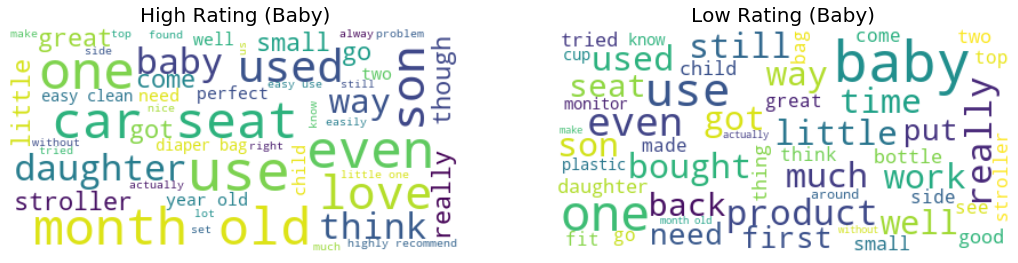

In [65]:
# import library

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator 
import matplotlib.pyplot as plt




fig, axs = plt.subplots(1, 2, figsize  = (18,6))


# Generate WordCloud images

wordcloud_high = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(high_baby)
wordcloud_low = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(low_baby)

# Display the image

axs[0].imshow(wordcloud_high, interpolation='bilinear')
axs[0].set_title('High Rating (Baby)', fontsize=20)
axs[0].axis('off')

axs[1].imshow(wordcloud_low, interpolation='bilinear')
axs[1].set_title('Low Rating (Baby)', fontsize=20)
axs[1].axis('off')

##### Grocery_Food Word Clouds

In [57]:
high_rating_food = grocery_foods.drop(columns=['reviewText','review_summary','clean_rev_token_food', 'clean_rev_stem_food'])[grocery_foods.rating >=4]
high_rating_food.head(2)

,rating,clean_review_food
0,4,another flavor kit kat taste unique bit differ...
2,4,really good great gift fan green tea expensive...


In [58]:
low_rating_food = grocery_foods.drop(columns=['reviewText','review_summary','clean_rev_token_food', 'clean_rev_stem_food'])[grocery_foods.rating <3]
low_rating_food.head(2)

,rating,clean_review_food
9,1,love green tea love kit two belong together ha...
32,1,product near natural organic wish seen want lo...


In [59]:
high_food = " ".join(review for review in high_rating_food.clean_review_food)
low_food = " ".join(review for review in low_rating_food.clean_review_food)

(-0.5, 399.5, 199.5, -0.5)

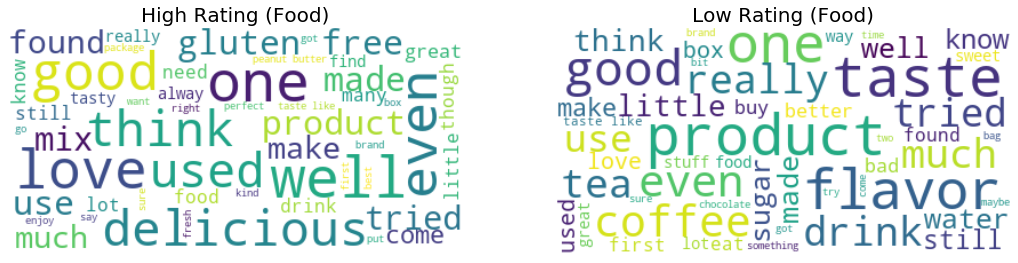

In [60]:
# import library

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator 
import matplotlib.pyplot as plt




fig, axs = plt.subplots(1, 2, figsize  = (18,6))


# Generate WordCloud images

wordcloud_high = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(high_food)
wordcloud_low = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(low_food)

# Display the image

axs[0].imshow(wordcloud_high, interpolation='bilinear')
axs[0].set_title('High Rating (Food)', fontsize=20)
axs[0].axis('off')

axs[1].imshow(wordcloud_low, interpolation='bilinear')
axs[1].set_title('Low Rating (Food)', fontsize=20)
axs[1].axis('off')

##### Cell_Phones Word Clouds

In [61]:
high_rating_phone = cell_phones.drop(columns=['reviewText','review_summary','clean_rev_token_phone', 'clean_rev_stem_phone'])[cell_phones.rating >=4]
high_rating_phone.head(2)

,rating,clean_review_phone
0,4,look good stick good like rounded shape always...
1,5,stickers work like review stick great stay pho...


In [62]:
low_rating_phone = cell_phones.drop(columns=['reviewText','review_summary','clean_rev_token_phone', 'clean_rev_stem_phone'])[cell_phones.rating <3]
low_rating_phone.head(2)

,rating,clean_review_phone
7,1,worked first week charge phone 20 waste money
19,1,worked great first couple stopped completely b...


In [63]:
high_phone = " ".join(review for review in high_rating_phone.clean_review_phone)
low_phone = " ".join(review for review in low_rating_phone.clean_review_phone)

(-0.5, 399.5, 199.5, -0.5)

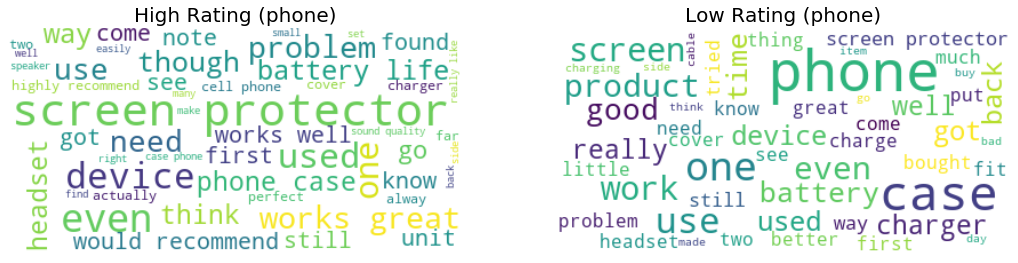

In [64]:
# import library

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator 
import matplotlib.pyplot as plt




fig, axs = plt.subplots(1, 2, figsize  = (18,6))


# Generate WordCloud images

wordcloud_high = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(high_phone)
wordcloud_low = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(low_phone)

# Display the image

axs[0].imshow(wordcloud_high, interpolation='bilinear')
axs[0].set_title('High Rating (phone)', fontsize=20)
axs[0].axis('off')

axs[1].imshow(wordcloud_low, interpolation='bilinear')
axs[1].set_title('Low Rating (phone)', fontsize=20)
axs[1].axis('off')

##### Word Clouds for Review summary

In [73]:
summary_high_rating_baby = baby_products.drop(columns=['reviewText', 'clean_review_baby', 'clean_rev_token_baby', 'clean_rev_stem_baby'])[baby_products.rating >=4]
summary_high_rating_baby.head(2)

,rating,review_summary
0,5,Awesine
1,5,Should be required for all new parents!


In [74]:
summary_low_rating_baby = baby_products.drop(columns=['reviewText', 'clean_review_baby', 'clean_rev_token_baby', 'clean_rev_stem_baby'])[baby_products.rating <3]
summary_low_rating_baby.head(2)

,rating,review_summary
74,1,Ridiculous design
92,1,Save your money!


In [75]:
summary_high_baby = ' '.join(rev for rev in summary_high_rating_baby.review_summary)
summary_low_baby = ' '.join(rev for rev in summary_low_rating_baby.review_summary)

(-0.5, 399.5, 199.5, -0.5)

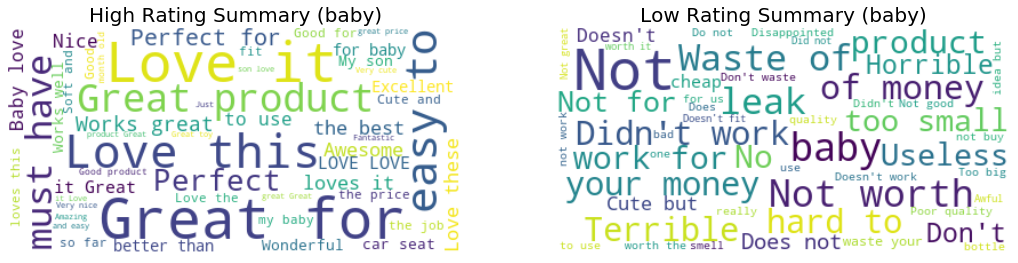

In [76]:
fig, axs = plt.subplots(1, 2, figsize  = (18,6))


# Generate WordCloud images

wordcloud_high = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(summary_high_baby)
wordcloud_low = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(summary_low_baby)

# Display the image

axs[0].imshow(wordcloud_high, interpolation='bilinear')
axs[0].set_title('High Rating Summary (baby)', fontsize=20)
axs[0].axis('off')

axs[1].imshow(wordcloud_low, interpolation='bilinear')
axs[1].set_title('Low Rating Summary (baby)', fontsize=20)
axs[1].axis('off')

In [78]:
summary_high_rating_food = grocery_foods.drop(columns=['reviewText', 'clean_review_food', 'clean_rev_token_food', 'clean_rev_stem_food'])[grocery_foods.rating >=4]

summary_low_rating_food = grocery_foods.drop(columns=['reviewText', 'clean_review_food', 'clean_rev_token_food', 'clean_rev_stem_food'])[grocery_foods.rating <3]


summary_high_food = ' '.join(rev for rev in summary_high_rating_food.review_summary)
summary_low_food = ' '.join(rev for rev in summary_low_rating_food.review_summary)

(-0.5, 399.5, 199.5, -0.5)

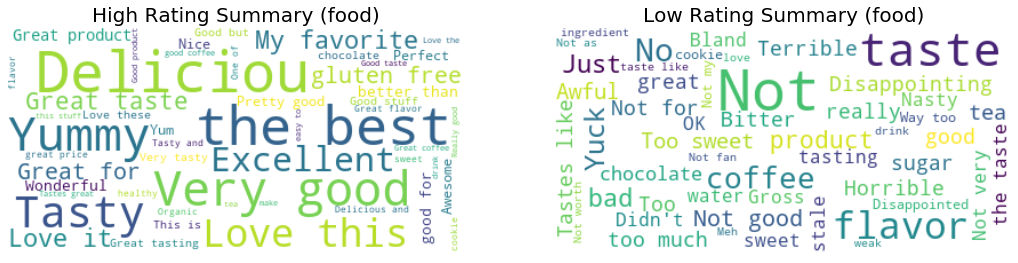

In [79]:
fig, axs = plt.subplots(1, 2, figsize  = (18,6))


# Generate WordCloud images

wordcloud_high = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(summary_high_food)
wordcloud_low = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(summary_low_food)

# Display the image

axs[0].imshow(wordcloud_high, interpolation='bilinear')
axs[0].set_title('High Rating Summary (food)', fontsize=20)
axs[0].axis('off')

axs[1].imshow(wordcloud_low, interpolation='bilinear')
axs[1].set_title('Low Rating Summary (food)', fontsize=20)
axs[1].axis('off')

In [80]:
summary_high_rating_phone = cell_phones.drop(columns=['reviewText', 'clean_review_phone', 'clean_rev_token_phone', 'clean_rev_stem_phone'])[cell_phones.rating >=4]

summary_low_rating_phone = cell_phones.drop(columns=['reviewText', 'clean_review_phone', 'clean_rev_token_phone', 'clean_rev_stem_phone'])[cell_phones.rating <3]


summary_high_phone = ' '.join(rev for rev in summary_high_rating_phone.review_summary)
summary_low_phone = ' '.join(rev for rev in summary_low_rating_phone.review_summary)

(-0.5, 399.5, 199.5, -0.5)

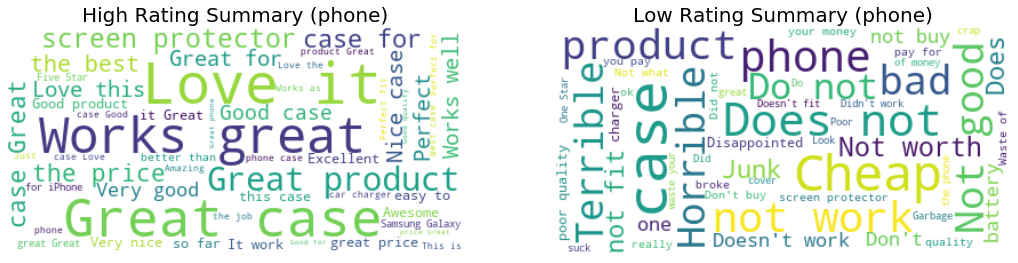

In [81]:
fig, axs = plt.subplots(1, 2, figsize  = (18,6))


# Generate WordCloud images

wordcloud_high = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(summary_high_phone)
wordcloud_low = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(summary_low_phone)

# Display the image

axs[0].imshow(wordcloud_high, interpolation='bilinear')
axs[0].set_title('High Rating Summary (phone)', fontsize=20)
axs[0].axis('off')

axs[1].imshow(wordcloud_low, interpolation='bilinear')
axs[1].set_title('Low Rating Summary (phone)', fontsize=20)
axs[1].axis('off')